In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv(r'C:\Users\Andrei.Baidurov\testTRAV\Data\letsFlyTestBookingMonth.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (735, 2)

First few rows:


,Booking Month,Booking Status
0,May 2025,Confirmed
1,May 2025,Cancelled
2,May 2025,Confirmed
3,May 2025,Confirmed
4,May 2025,Confirmed


In [3]:
# Install ipywidgets if not already installed
%pip install ipywidgets

# Create interactive widgets for filtering by booking status
from ipywidgets import interact, Dropdown
import matplotlib.pyplot as plt

def plot_filtered_data(status_filter='All'):
    """Plot data filtered by booking status"""
    
    # Filter data based on selection
    if status_filter == 'All':
        filtered_df = df
        title_suffix = "All Bookings"
    else:
        filtered_df = df[df['Booking Status'] == status_filter]
        title_suffix = f"{status_filter} Bookings Only"
    
    if len(filtered_df) == 0:
        print(f"No data available for {status_filter} bookings")
        return
    
    # Calculate monthly counts for filtered data
    monthly_counts = filtered_df.groupby('Booking Month').size().reset_index(name='Count')
    monthly_counts['Month_Date'] = pd.to_datetime(monthly_counts['Booking Month'], format='%b %Y')
    monthly_counts = monthly_counts.sort_values('Month_Date')
    
    # Set colors based on status
    color_map = {'Confirmed': '#4ECDC4', 'Cancelled': '#FF6B6B', 'Rejected': '#45B7D1', 'All': '#96CEB4'}
    plot_color = color_map.get(status_filter, '#96CEB4')
    
    # Create visualization
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.patch.set_facecolor('#FAFAFA')
    
    # Bar chart
    bars = axes[0].bar(monthly_counts['Booking Month'], monthly_counts['Count'], 
                       color=plot_color, alpha=0.8, edgecolor='white', linewidth=1.2)
    axes[0].set_title(f'Monthly {title_suffix}', fontsize=14, fontweight='bold', pad=20)
    axes[0].set_xlabel('Month', fontsize=12)
    axes[0].set_ylabel('Number of Bookings', fontsize=12)
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(True, alpha=0.3)
    axes[0].set_facecolor('#FAFAFA')
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{int(height)}', ha='center', va='bottom', fontweight='bold')
    
    # Line chart
    axes[1].plot(monthly_counts['Booking Month'], monthly_counts['Count'], 
                marker='o', markersize=8, color=plot_color, linewidth=3, alpha=0.9)
    axes[1].set_title(f'{title_suffix} Trend', fontsize=14, fontweight='bold', pad=20)
    axes[1].set_xlabel('Month', fontsize=12)
    axes[1].set_ylabel('Number of Bookings', fontsize=12)
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(True, alpha=0.3)
    axes[1].set_facecolor('#FAFAFA')
    
    plt.tight_layout()
    plt.show()
    
    # Display summary statistics
    print(f"\n{title_suffix} Summary:")
    print(f"Total bookings: {len(filtered_df)}")
    print(f"Months covered: {len(monthly_counts)}")
    print(f"Average per month: {len(filtered_df) / len(monthly_counts):.1f}")
    print(f"Peak month: {monthly_counts.loc[monthly_counts['Count'].idxmax(), 'Booking Month']} ({monthly_counts['Count'].max()} bookings)")
    print(f"Lowest month: {monthly_counts.loc[monthly_counts['Count'].idxmin(), 'Booking Month']} ({monthly_counts['Count'].min()} bookings)")

# Create dropdown widget
status_options = ['All', 'Confirmed', 'Cancelled', 'Rejected']
interact(plot_filtered_data, status_filter=Dropdown(options=status_options, value='All', description='Status:'))


Note: you may need to restart the kernel to use updated packages.


interactive(children=(Dropdown(description='Status:', options=('All', 'Confirmed', 'Cancelled', 'Rejected'), v…

<function __main__.plot_filtered_data(status_filter='All')>

Bookings by Month and Status (Chronologically Sorted):
Booking Status  Cancelled  Confirmed  Rejected
Booking Month                                 
Nov 2024              0.0        1.0       0.0
Dec 2024              4.0        0.0       0.0
Jan 2025             34.0       65.0      14.0
Feb 2025             21.0       55.0      10.0
Mar 2025             14.0       61.0      15.0
Apr 2025             22.0      116.0      11.0
May 2025             29.0      251.0      12.0


C:\Users\Andrei.Baidurov\AppData\Local\Temp\ipykernel_20080\3144161848.py:103: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout(pad=3.0)
C:\Users\Andrei.Baidurov\AppData\Local\Temp\ipykernel_20080\3144161848.py:103: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout(pad=3.0)
C:\Users\Andrei.Baidurov\AppData\Local\Temp\ipykernel_20080\3144161848.py:103: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout(pad=3.0)
C:\Users\Andrei.Baidurov\AppData\Local\Temp\ipykernel_20080\3144161848.py:103: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout(pad=3.0)
C:\Users\Andrei.Baidurov\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Andrei.Baidurov\AppData\Roaming\Py

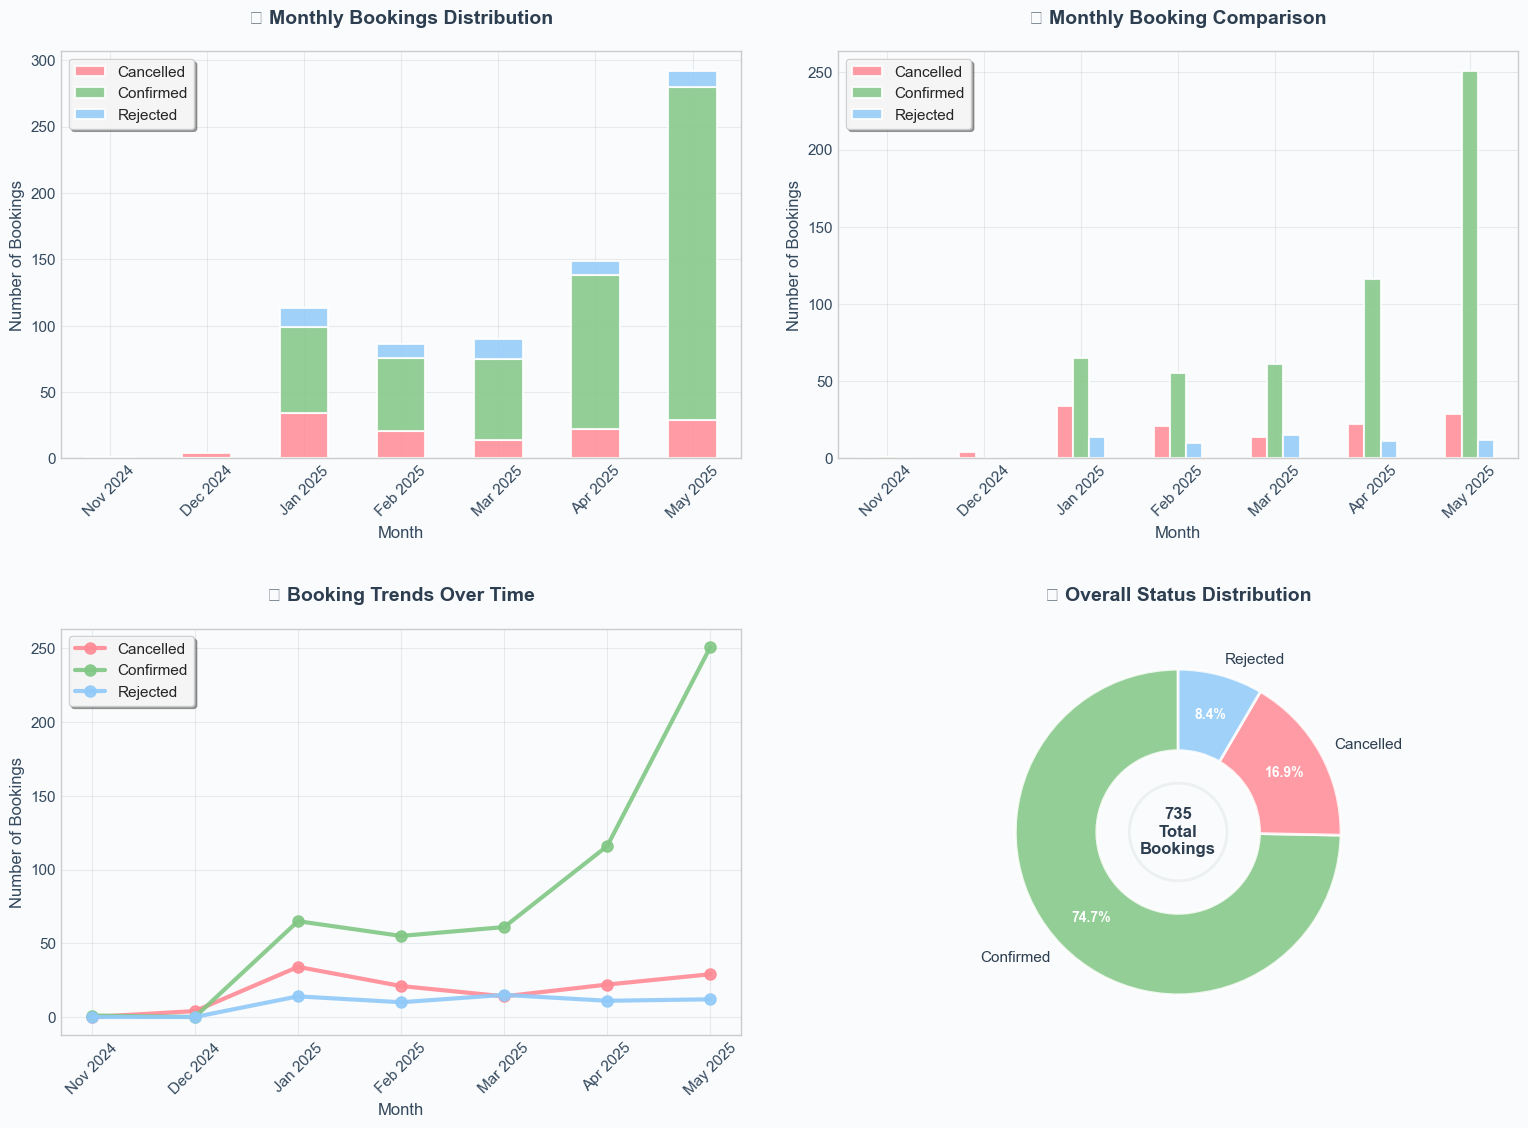


📈 BOOKING ANALYTICS SUMMARY
✅ Total bookings: 735
🟢 Confirmed bookings: 549 (74.7%)
🔴 Cancelled bookings: 124 (16.9%)
🔵 Rejected bookings: 62 (8.4%)


In [5]:
# Convert 'Booking Month' to datetime for proper sorting
df['Month_Date'] = pd.to_datetime(df['Booking Month'], format='%b %Y')
df_sorted = df.sort_values('Month_Date')

# Calculate bookings by month and status with sorted data
bookings_summary = df_sorted.groupby(['Booking Month', 'Booking Status']).size().reset_index(name='Count')

# Create a pivot table with properly sorted months
pivot_table = bookings_summary.pivot(index='Booking Month', columns='Booking Status', values='Count').fillna(0)

# Sort the pivot table by converting index to datetime
month_order = pd.to_datetime(pivot_table.index, format='%b %Y').sort_values()
sorted_months = [month.strftime('%b %Y') for month in month_order]
pivot_table = pivot_table.reindex(sorted_months)

print("Bookings by Month and Status (Chronologically Sorted):")
print(pivot_table)

# Modern soft color palette
colors = {
    'Cancelled': '#FF8A95',    # Soft coral pink
    'Confirmed': '#81C784',    # Soft mint green
    'Rejected': '#90CAF9'      # Soft sky blue
}

# Set modern styling
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 11

# Create visualizations with modern styling
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.patch.set_facecolor('#FAFBFC')

# 1. Stacked bar chart with soft colors
pivot_table.plot(kind='bar', stacked=True, ax=axes[0,0], 
                color=[colors['Cancelled'], colors['Confirmed'], colors['Rejected']], 
                alpha=0.85, edgecolor='white', linewidth=1.5)
axes[0,0].set_title('📊 Monthly Bookings Distribution', fontsize=14, fontweight='bold', pad=20, color='#2C3E50')
axes[0,0].set_xlabel('Month', fontsize=12, color='#34495E')
axes[0,0].set_ylabel('Number of Bookings', fontsize=12, color='#34495E')
axes[0,0].tick_params(axis='x', rotation=45, colors='#34495E')
axes[0,0].tick_params(axis='y', colors='#34495E')
axes[0,0].set_facecolor('#FAFBFC')
axes[0,0].grid(True, alpha=0.3, color='#BDC3C7')
axes[0,0].legend(frameon=True, fancybox=True, shadow=True, framealpha=0.9)

# 2. Grouped bar chart with soft colors
pivot_table.plot(kind='bar', ax=axes[0,1], 
                color=[colors['Cancelled'], colors['Confirmed'], colors['Rejected']], 
                alpha=0.85, edgecolor='white', linewidth=1.5)
axes[0,1].set_title('📈 Monthly Booking Comparison', fontsize=14, fontweight='bold', pad=20, color='#2C3E50')
axes[0,1].set_xlabel('Month', fontsize=12, color='#34495E')
axes[0,1].set_ylabel('Number of Bookings', fontsize=12, color='#34495E')
axes[0,1].tick_params(axis='x', rotation=45, colors='#34495E')
axes[0,1].tick_params(axis='y', colors='#34495E')
axes[0,1].set_facecolor('#FAFBFC')
axes[0,1].grid(True, alpha=0.3, color='#BDC3C7')
axes[0,1].legend(frameon=True, fancybox=True, shadow=True, framealpha=0.9)

# 3. Line plot with soft colors and markers
pivot_table.plot(kind='line', ax=axes[1,0], marker='o', markersize=8, linewidth=3,
                color=[colors['Cancelled'], colors['Confirmed'], colors['Rejected']], 
                alpha=0.9)
axes[1,0].set_title('📉 Booking Trends Over Time', fontsize=14, fontweight='bold', pad=20, color='#2C3E50')
axes[1,0].set_xlabel('Month', fontsize=12, color='#34495E')
axes[1,0].set_ylabel('Number of Bookings', fontsize=12, color='#34495E')
axes[1,0].tick_params(axis='x', rotation=45, colors='#34495E')
axes[1,0].tick_params(axis='y', colors='#34495E')
axes[1,0].set_facecolor('#FAFBFC')
axes[1,0].grid(True, alpha=0.3, color='#BDC3C7')
axes[1,0].legend(frameon=True, fancybox=True, shadow=True, framealpha=0.9)

# 4. Modern donut chart for total bookings by status
status_totals = df['Booking Status'].value_counts()
pie_colors = [colors[status] for status in status_totals.index]

# Create donut chart
wedges, texts, autotexts = axes[1,1].pie(status_totals.values, labels=status_totals.index, 
                                         autopct='%1.1f%%', colors=pie_colors,
                                         wedgeprops=dict(width=0.5, alpha=0.85, edgecolor='white', linewidth=2),
                                         textprops={'fontsize': 11, 'color': '#2C3E50'},
                                         pctdistance=0.75, startangle=90)

# Style the percentage text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

axes[1,1].set_title('🎯 Overall Status Distribution', fontsize=14, fontweight='bold', pad=20, color='#2C3E50')

# Add a circle at the center for donut effect
centre_circle = plt.Circle((0,0), 0.3, fc='#FAFBFC', linewidth=2, edgecolor='#ECF0F1')
axes[1,1].add_artist(centre_circle)

# Add total count in center
total_bookings = len(df)
axes[1,1].text(0, 0, f'{total_bookings}\nTotal\nBookings', 
               horizontalalignment='center', verticalalignment='center',
               fontsize=12, fontweight='bold', color='#2C3E50')

plt.tight_layout(pad=3.0)
plt.show()

# Print enhanced summary statistics with emojis
print(f"\n{'='*50}")
print(f"📈 BOOKING ANALYTICS SUMMARY")
print(f"{'='*50}")
print(f"✅ Total bookings: {len(df):,}")
print(f"🟢 Confirmed bookings: {status_totals.get('Confirmed', 0):,} ({status_totals.get('Confirmed', 0)/len(df)*100:.1f}%)")
print(f"🔴 Cancelled bookings: {status_totals.get('Cancelled', 0):,} ({status_totals.get('Cancelled', 0)/len(df)*100:.1f}%)")
print(f"🔵 Rejected bookings: {status_totals.get('Rejected', 0):,} ({status_totals.get('Rejected', 0)/len(df)*100:.1f}%)")
print(f"{'='*50}")